# **Step 1: Importing the Libraries and Exploring the Data**

In [1092]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import joblib

In [1093]:
water = pd.read_csv("D:/college/second year/second term/Artificial intelligence/project_final_water_quality/water_potability.csv")

In [1094]:
#show info of data and datatypes of columns
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [1095]:
#show statistical informations about columns
water.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [1096]:
water.sample(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
187,8.661592,284.098352,27088.476460,7.897857,NaN,512.277310,16.912142,72.465763,3.670431,0
1017,8.551078,216.415932,28909.290284,6.936782,295.223707,510.895001,16.202371,79.859323,4.046380,0
1107,6.799376,239.057680,7986.493239,10.365680,419.881175,373.232137,18.828594,43.440644,3.819985,1
1606,6.442496,183.071355,11592.445624,8.960736,408.242670,385.014867,16.148258,83.332516,2.891019,1
515,5.701155,233.515043,41411.601707,5.895464,310.160545,509.767888,22.686837,73.751883,3.403136,0
2532,8.854120,222.965198,19258.803073,5.696064,395.728541,467.088442,10.454029,73.779007,3.461350,0
2903,9.004352,222.489783,16544.827504,6.124095,NaN,411.193621,16.036914,67.264669,3.527893,0
1202,6.911698,179.213674,25612.148912,7.224710,318.987914,298.550513,11.858905,94.340172,4.616641,1
740,7.061846,211.091687,11300.238109,8.866359,299.938071,353.510425,16.895754,67.577109,3.958249,1
2966,6.040282,139.770872,20472.874588,6.810978,357.593277,488.274930,15.882252,53.279042,5.761580,0


In [1097]:
#first 5 column
water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [1098]:
#last 5 column
water.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


In [1099]:
#number of rows and column
water.shape

(3276, 10)

# **Step 2: Data Visualization**

In [1100]:
#check nulls in the data to check fo inbalancness
print (water.isnull().sum())


ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [1101]:
#Replace null values based on the group/sample mean
col=['ph','Sulfate','Trihalomethanes']
for i in col :
 water[i]=water[i].fillna(water.groupby(['Potability'])[i].transform('mean'))



In [1102]:
#check again to improve no nulls
water.isnull().sum()


ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

we need to see if the data is balanced or not

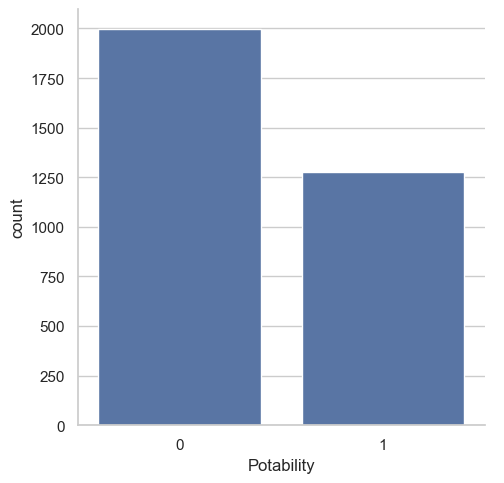

In [1103]:
sns.catplot(x='Potability', data =water, kind = 'count')

we need to oversample the the minorty class (potability of 1)

In [1104]:
# from imblearn.over_sampling import SMOTE
# import pandas as pd
# # Separate features and target variable
# X = water.drop(columns=['Potability'])
# y = water['Potability']

# # Apply SMOTE to balance the data
# smote = SMOTE(random_state=42)
# X_resampled, y_resampled = smote.fit_resample(X, y)
# # Concatenate resampled features and target variable into a new DataFrame
# water = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='Potability')], axis=1)
# # Print the count of each class in the balanced dataset
# print("Now, it is balanced:")
# print(water['Potability'].value_counts())

In [1105]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

# Separate features and target variable
X = water.drop(columns=['Potability'])
y = water['Potability']

# Apply RandomOverSampler to balance the data
ros = RandomOverSampler(random_state=42)
X, y = ros.fit_resample(X, y)

# Concatenate resampled features and target variable into a new DataFrame
water = pd.concat([pd.DataFrame(X, columns=X.columns), pd.Series(y, name='Potability')], axis=1)

# Print the count of each class in the balanced dataset
print("Now, it is balanced:")
print(water['Potability'].value_counts())

Now, it is balanced:
Potability
0    1998
1    1998
Name: count, dtype: int64


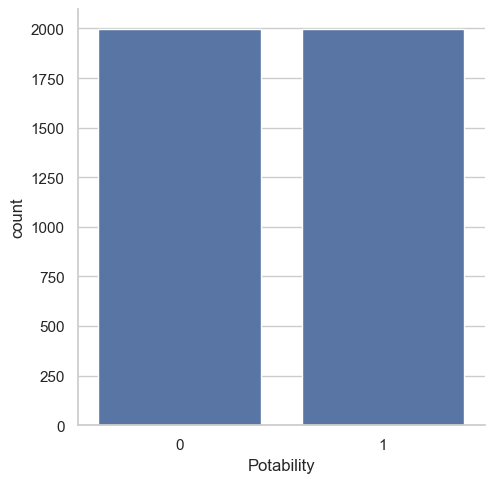

In [1106]:
sns.catplot(x='Potability', data =water, kind = 'count')

In [1107]:
# plot = plt.figure(figsize=(3,10))
# sns.barplot(x='Potability', y = 'Chloramines', data = water)

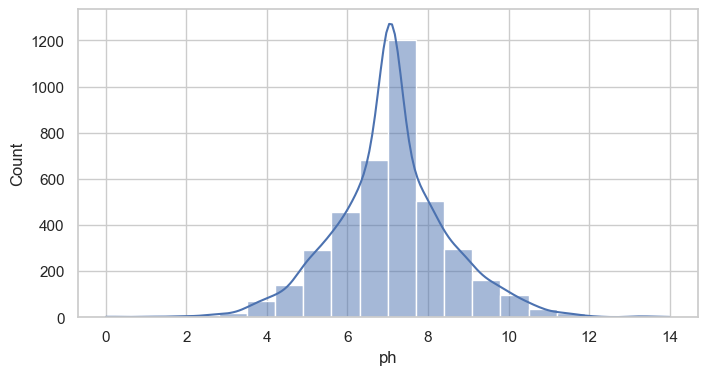

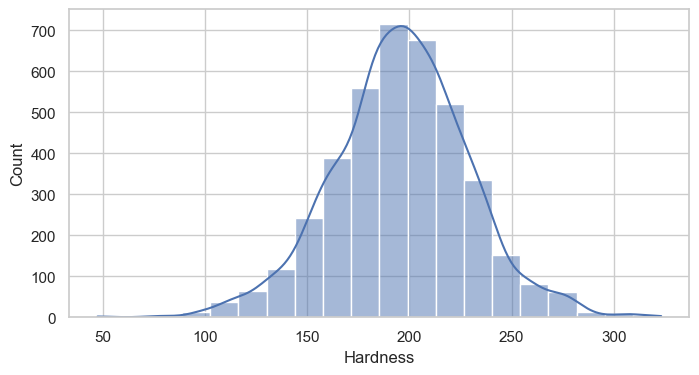

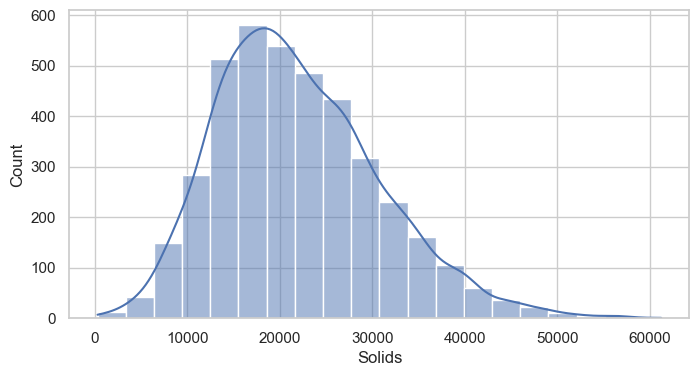

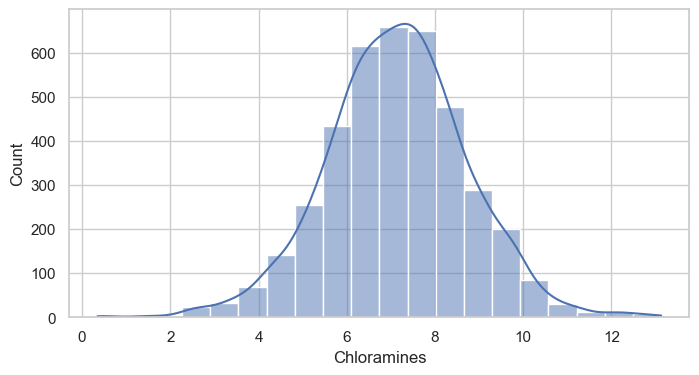

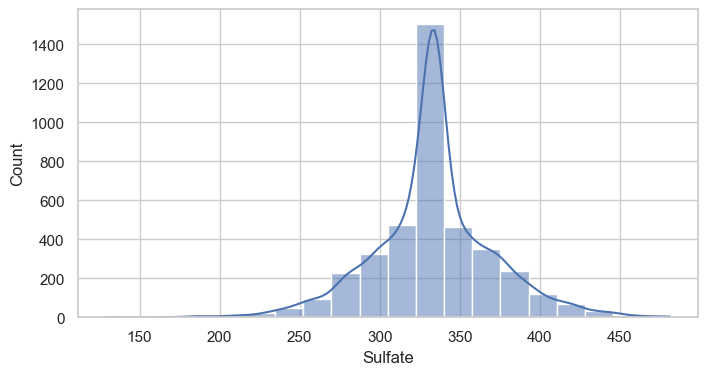

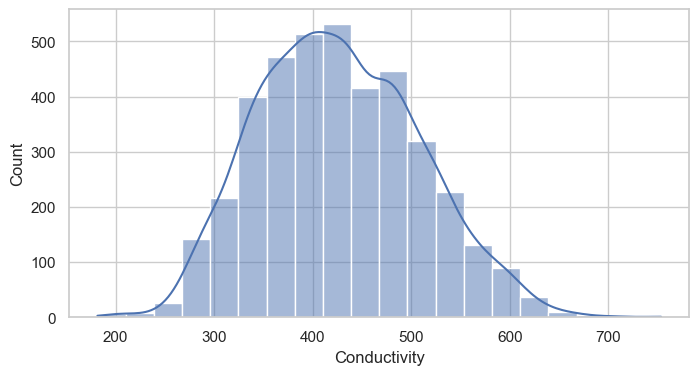

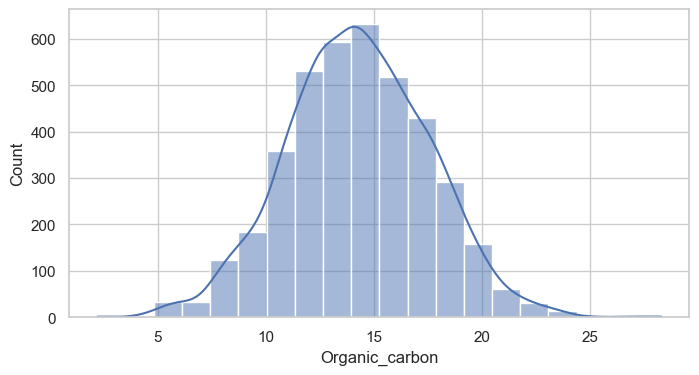

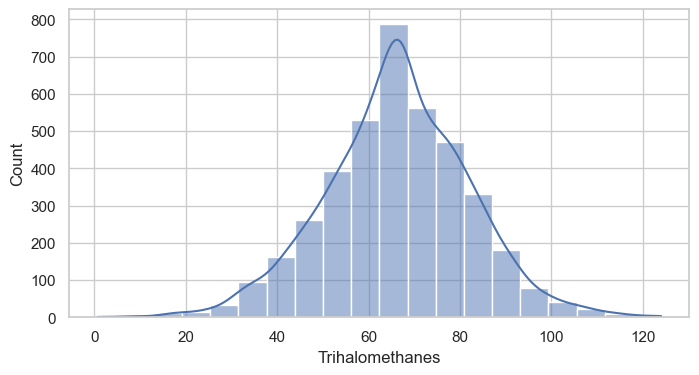

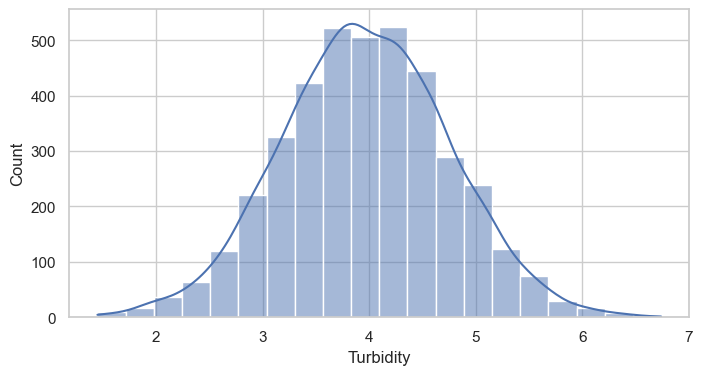

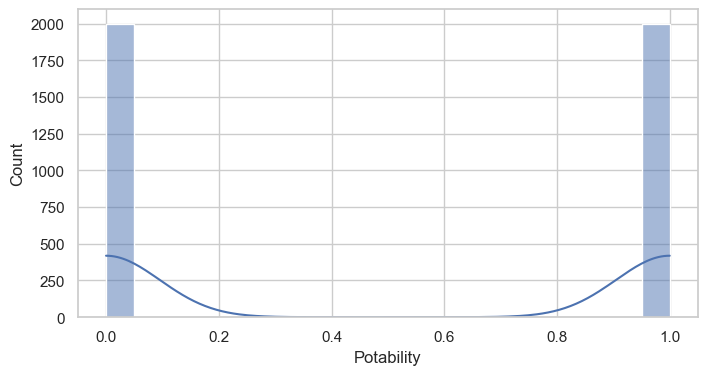

In [1108]:
numeric = water.select_dtypes(include=['int64','float64']).columns
for col in numeric:
 plt.figure(figsize=(8,4))
 sns.histplot(data=water,x=col,kde=True, bins=20)
 plt.show()

correlation of all Data


<Axes: >

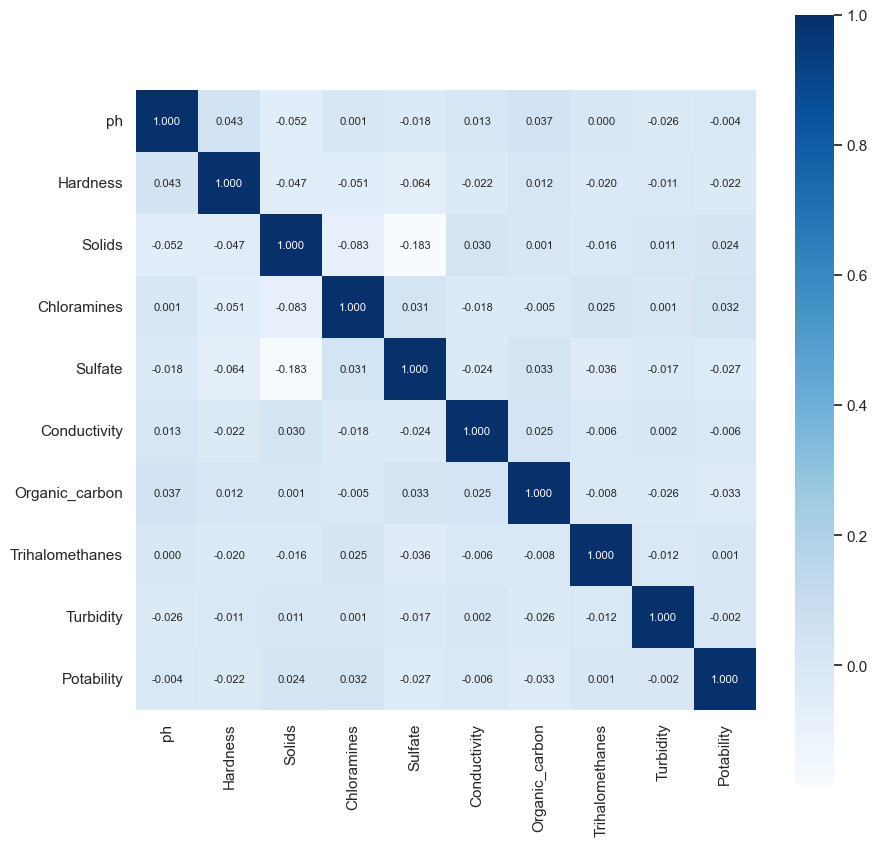

In [1109]:
correlation = water.corr()
print("correlation of all Data")
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt = '.3f', annot = True, annot_kws={'size':8}, cmap = 'Blues')

correlation of all Data


<Axes: >

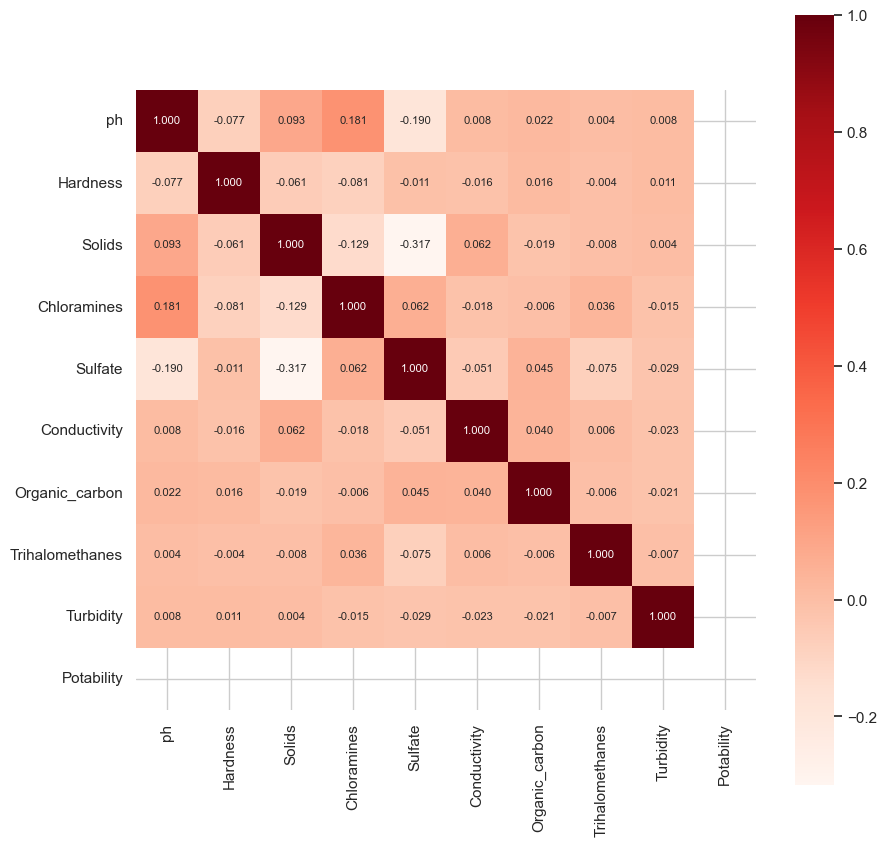

In [1110]:
correlation1 = (water[water['Potability']==1]).corr()
print("correlation of all Data")
plt.figure(figsize=(10,10))
sns.heatmap(correlation1, cbar=True, square=True, fmt = '.3f', annot = True, annot_kws={'size':8}, cmap = 'Reds')

correlation of all Data


<Axes: >

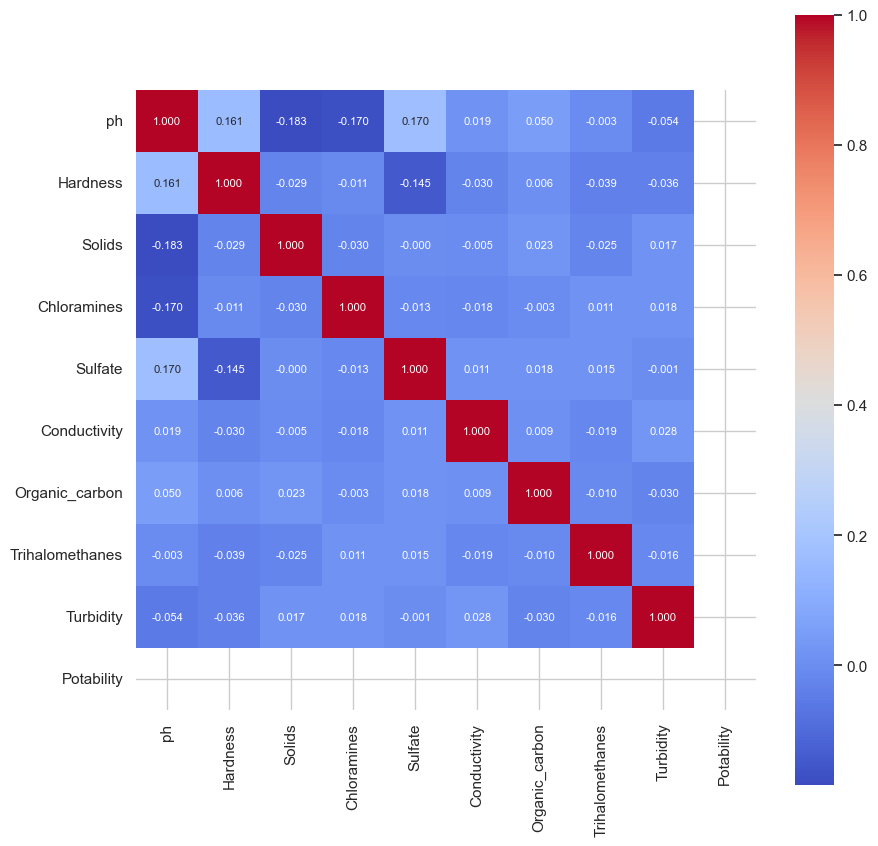

In [1111]:
correlation0 = (water[water['Potability']==0]).corr()
print("correlation of all Data")
plt.figure(figsize=(10,10))
sns.heatmap(correlation0, cbar=True, square=True, fmt = '.3f', annot = True, annot_kws={'size':8}, cmap = 'coolwarm')

In [1112]:
# sns.pairplot(water,hue='Potability')
# plt.show()

# **Step 3: Data Cleaining, Noise/Outlier/duplicate**

In [1113]:
water.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3991     True
3992     True
3993     True
3994     True
3995     True
Length: 3996, dtype: bool

In [1114]:
#check duplicated in the data
water.duplicated().sum()

720

C:\Users\Karen\AppData\Local\Temp\ipykernel_26848\128603062.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=water[col], ax=axs[idx], palette='rainbow')
C:\Users\Karen\AppData\Local\Temp\ipykernel_26848\128603062.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=water[col], ax=axs[idx], palette='rainbow')
C:\Users\Karen\AppData\Local\Temp\ipykernel_26848\128603062.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=water[col], ax=axs[idx], palette='rainbow')
C:\Users\Karen\AppData\Local\Temp\ipykernel_26848\128603062.py:12: Fut

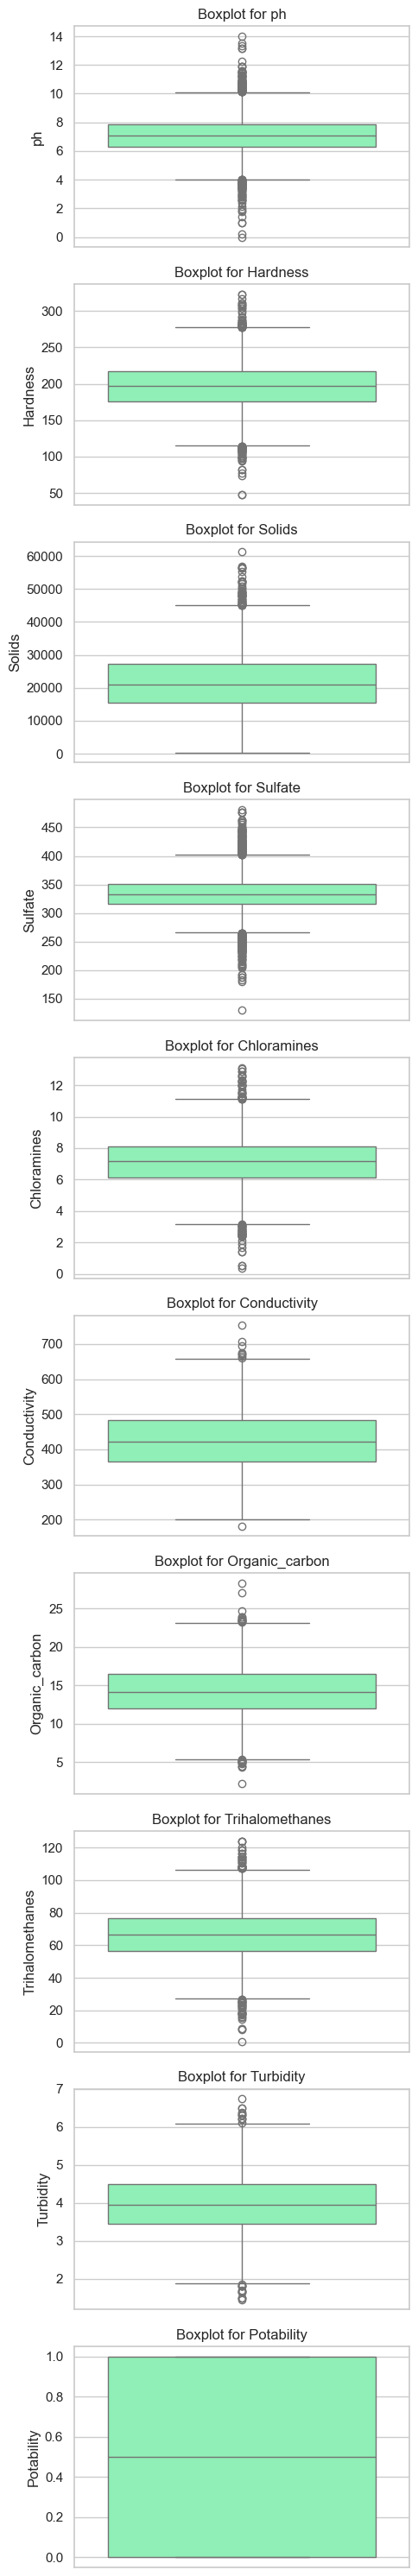

In [1115]:
# Set the style of seaborn
sns.set(style="whitegrid")

# List of columns for which to create box plots
columns = ['ph', 'Hardness', 'Solids', 'Sulfate', 'Chloramines', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']

# Create a figure and axes using plt.subplots
fig, axs = plt.subplots(nrows=len(columns), ncols=1, figsize=(5, 30))

# Create box plots for each column
for idx, col in enumerate(columns):
    sns.boxplot(y=water[col], ax=axs[idx], palette='rainbow')
    axs[idx].set_title(f'Boxplot for {col}')
    axs[idx].set_ylabel(col)
    axs[idx].set_xlabel('')

# Adjust the spacing between subplots
plt.tight_layout()
plt.show()

fff

In [1116]:
#remove outliers
columns = ['ph','Hardness','Solids','Sulfate','Chloramines','Conductivity','Organic_carbon','Trihalomethanes','Turbidity','Potability']
for col in columns:
    # calculate interquartile range
    q25, q75 = np.percentile(water[col], 25), np.percentile(water[col], 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = ( ( water[col] < lower) | (water[col] > upper) )
    index_label = water[outliers].index
    print(f'Number of outliers in {col}: {len(index_label)}')
    water.drop(index_label, inplace=True)

Number of outliers in ph: 188
Number of outliers in Hardness: 89
Number of outliers in Solids: 43
Number of outliers in Sulfate: 288
Number of outliers in Chloramines: 61
Number of outliers in Conductivity: 6
Number of outliers in Organic_carbon: 18
Number of outliers in Trihalomethanes: 53
Number of outliers in Turbidity: 25
Number of outliers in Potability: 0


In [1117]:
# columns = ['ph', 'Hardness', 'Solids', 'Sulfate', 'Chloramines', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']

# for col in columns:
#     # Calculate interquartile range
#     q25, q75 = np.percentile(water[col], 25), np.percentile(water[col], 75)
#     iqr = q75 - q25

#     # Calculate the outlier cutoff
#     cut_off = iqr * 1.5
#     lower, upper = q25 - cut_off, q75 + cut_off

#     # Identify outliers
#     outliers_lower = water[col] < lower
#     outliers_upper = water[col] > upper

#     # Replace outliers with boundaries
#     water.loc[outliers_lower, col] = q25
#     water.loc[outliers_upper, col] = q75

#     # Print number of replaced outliers
#     print(f'Number of outliers in {col}: {outliers_lower.sum() + outliers_upper.sum()}')

In [1118]:
# columns = ['ph', 'Hardness', 'Solids', 'Sulfate', 'Chloramines', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']

# for col in columns:
#     # Calculate interquartile range
#     q25, q75 = np.percentile(water[col], 25), np.percentile(water[col], 75)
#     iqr = q75 - q25

#     # Calculate the outlier cutoff
#     cut_off = iqr * 1.5
#     lower, upper = q25 - cut_off, q75 + cut_off

#     # Identify outliers
#     outliers = ((water[col] < lower) | (water[col] > upper))
#     index_label = water[outliers].index
#     print(f'Number of outliers in {col}: {len(index_label)}')

#     # Replace outliers with mean
#     mean_val = water.loc[outliers, col].mean()  # Calculate mean excluding outliers
#     water.loc[outliers, col] = mean_val  # Replace outliers with mean value

In [1119]:
water['Potability'].value_counts()

Potability
0    1652
1    1573
Name: count, dtype: int64

In [1120]:
def predict(model, X_train, X_test, y_train, y_test, name, namelist, acc_list,trainacc_list, f1_list):
    # Fitting the model
    model.fit(X_train, y_train)

    # Making Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Confusion Matrix for test set
    cm_test = confusion_matrix(y_test, y_test_pred)

    # Calculating and printing the Accuracy for both train and test sets
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)

    # Calculating F1 score for test set
    f1 = f1_score(y_test, y_test_pred, average='binary')

    # Appending results to lists
    namelist.append(name)
    acc_list.append(test_acc)
    f1_list.append(f1)
    trainacc_list.append(train_acc)


    # Printing performance metrics
    print("Performance of", name, "model\n")
    print('Train Accuracy Score:', train_acc)
    print('Test Accuracy Score:', test_acc)
    print('-' * 50, '\nClassification Report for test set')
    print(classification_report(y_test, y_test_pred))
    print('-' * 50, '\nConfusion Matrix (Test Set)')
    print(cm_test, '\n')
    print('Precision Score:', precision_score(y_test, y_test_pred, average='binary'))
    print('Recall Score:', recall_score(y_test, y_test_pred, average='binary'))
    print('F1 Score:', f1, '\n')
    #Confusion metrix
    #cm=confusion_matrix(y_test,lr.predict(X_test))
    cmd=metrics.ConfusionMatrixDisplay(cm_test)
    cmd.plot()
    plt.show()



In [1121]:
# Making a dataframe to store the accuracy and f1 Score
scores = pd.DataFrame(columns=['Model Name','Accuracy','F1 score'])
names = []
testacc = []
f1s = []
trainacc=[]

In [1122]:
X = water.drop('Potability', axis=1)
y= water['Potability']
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [1123]:
from sklearn.preprocessing import MinMaxScaler


st_scalar=StandardScaler()
scaler = MinMaxScaler()

st_scalar.fit(X_train)

X_train=st_scalar.transform(X_train)
X_test=st_scalar.transform(X_test)

# scaler.fit(x_train)
# x_train=scaler.transform(x_train)
# x_test=scaler.transform(x_test)



# **Logistic** **Regression**

Performance of Logistic Regression model

Train Accuracy Score: 0.5298449612403101
Test Accuracy Score: 0.5100775193798449
-------------------------------------------------- 
Classification Report for test set
              precision    recall  f1-score   support

           0       0.52      0.67      0.58       330
           1       0.50      0.35      0.41       315

    accuracy                           0.51       645
   macro avg       0.51      0.51      0.50       645
weighted avg       0.51      0.51      0.50       645

-------------------------------------------------- 
Confusion Matrix (Test Set)
[[220 110]
 [206 109]] 

Precision Score: 0.4977168949771689
Recall Score: 0.346031746031746
F1 Score: 0.40823970037453183 



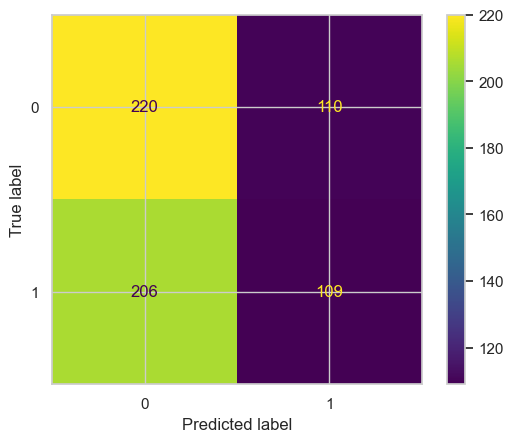

In [1124]:
# Define the base model
lr = LogisticRegression(solver='liblinear',C=0.3,penalty='l2')
# Passing the model to the Function
predict(lr,X_train,X_test,Y_train,Y_test,"Logistic Regression",names,testacc,trainacc,f1s)
 



In [1125]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression())
])

param_grid = {
    'logreg__solver': ['liblinear', 'newton-cg', 'sag', 'saga'],
    'logreg__C': [0.01, 0.1, 1, 10, 100],
    'logreg__penalty': ['l2'],
    'logreg__max_iter': [200, 300, 400, 500]
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)
print("Best hyperparameters from Grid Search with Scaling and Alternative Solvers: ", grid_search.best_params_)


Best hyperparameters from Grid Search with Scaling and Alternative Solvers:  {'logreg__C': 0.1, 'logreg__max_iter': 200, 'logreg__penalty': 'l2', 'logreg__solver': 'liblinear'}


Performance of Logistic Regression grid search model

Train Accuracy Score: 0.5255813953488372
Test Accuracy Score: 0.4992248062015504
-------------------------------------------------- 
Classification Report for test set
              precision    recall  f1-score   support

           0       0.51      0.69      0.59       330
           1       0.48      0.30      0.37       315

    accuracy                           0.50       645
   macro avg       0.49      0.49      0.48       645
weighted avg       0.49      0.50      0.48       645

-------------------------------------------------- 
Confusion Matrix (Test Set)
[[229 101]
 [222  93]] 

Precision Score: 0.4793814432989691
Recall Score: 0.29523809523809524
F1 Score: 0.3654223968565815 



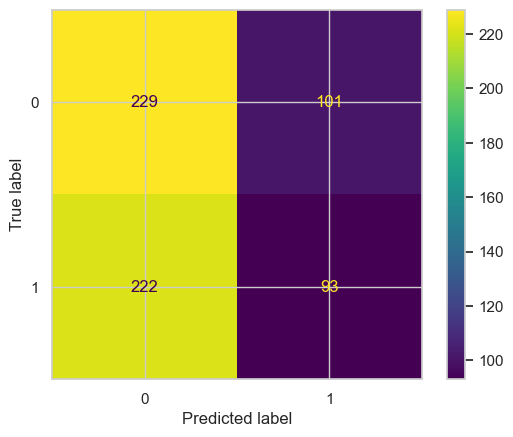

In [1126]:
# Define the base model
lr = LogisticRegression(solver='newton-cg',C=0.01,penalty='l2',max_iter=200)
# Passing the model to the Function
predict(lr,X_train,X_test,Y_train,Y_test,"Logistic Regression grid search",names,testacc,trainacc,f1s)

# **Random Forest**

Performance of Random Forest model

Train Accuracy Score: 0.9131782945736434
Test Accuracy Score: 0.8031007751937984
-------------------------------------------------- 
Classification Report for test set
              precision    recall  f1-score   support

           0       0.81      0.80      0.81       330
           1       0.79      0.81      0.80       315

    accuracy                           0.80       645
   macro avg       0.80      0.80      0.80       645
weighted avg       0.80      0.80      0.80       645

-------------------------------------------------- 
Confusion Matrix (Test Set)
[[264  66]
 [ 61 254]] 

Precision Score: 0.79375
Recall Score: 0.8063492063492064
F1 Score: 0.8 



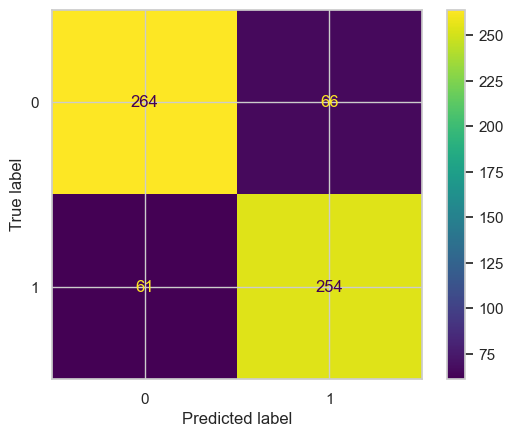

In [1127]:
rf = RandomForestClassifier(n_estimators = 150,max_depth=8,min_samples_split= 4,min_samples_leaf= 2, criterion = 'entropy',max_features='sqrt', random_state = 0)
# Passing the model to the Function
predict(rf,X_train,X_test,Y_train,Y_test,"Random Forest",names,testacc,trainacc,f1s)

The precision, recall, and F1-scores are fairly balanced across both classes, indicating that the model is performing consistently.



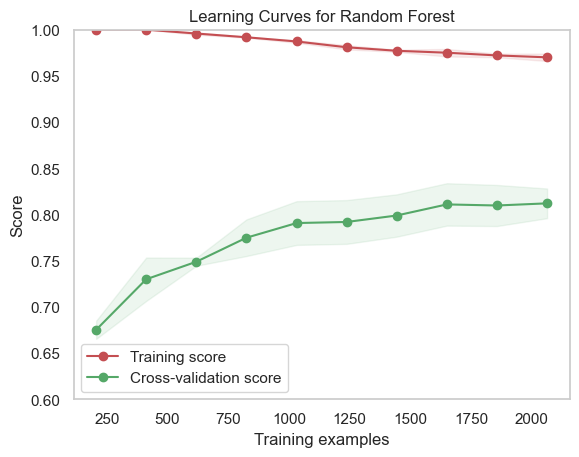

In [1128]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier

# Define the model
rf = RandomForestClassifier(n_estimators = 100,max_depth=10,min_samples_split= 2,min_samples_leaf= 2, criterion = 'entropy',max_features='sqrt', random_state = 0)

# Generate learning curve data
train_sizes, train_scores, valid_scores = learning_curve(
    rf, X_train, Y_train, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

# Plot learning curves
plt.figure()
plt.title("Learning Curves for Random Forest")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.ylim(0.6, 1.0)
plt.grid()

# Plot the training scores
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")

# Plot the validation scores
plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, valid_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

In [1129]:


# # Define the model
# rf = RandomForestClassifier()

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2', None]
# }

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# # Fit the model
# grid_search.fit(X_train, y_train)

# # Best parameters and model
# best_params = grid_search.best_params_
# best_rf = grid_search.best_estimator_

# print("Best parameters found: ", best_params)
# print("Best cross-validation accuracy: ", grid_search.best_score_)

# # # Evaluate on the test set
# # test_accuracy = best_rf.score(X_test, y_test)
# # print("Test set accuracy: ", test_accuracy)

# **Naive Bayes**

Performance of Gaussian Naive Bayes model

Train Accuracy Score: 0.562015503875969
Test Accuracy Score: 0.5364341085271318
-------------------------------------------------- 
Classification Report for test set
              precision    recall  f1-score   support

           0       0.54      0.67      0.60       330
           1       0.53      0.39      0.45       315

    accuracy                           0.54       645
   macro avg       0.54      0.53      0.53       645
weighted avg       0.54      0.54      0.53       645

-------------------------------------------------- 
Confusion Matrix (Test Set)
[[222 108]
 [191 124]] 

Precision Score: 0.5344827586206896
Recall Score: 0.39365079365079364
F1 Score: 0.453382084095064 



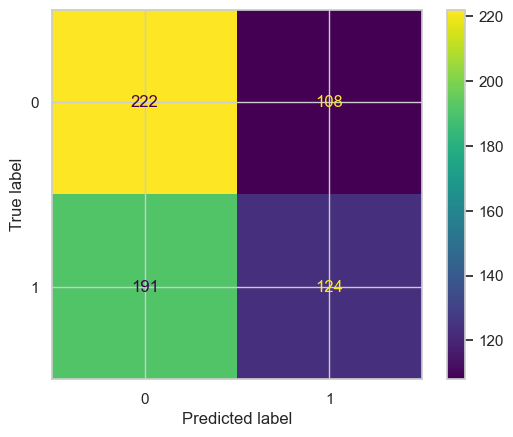

In [1130]:
# Making the model
nb = GaussianNB()
# Passing the model to the Function
predict(nb,X_train,X_test,Y_train,Y_test,"Gaussian Naive Bayes",names,testacc,trainacc,f1s)

## **SVM**

Performance of Support Vector Machine model

Train Accuracy Score: 0.9949612403100775
Test Accuracy Score: 0.7705426356589147
-------------------------------------------------- 
Classification Report for test set
              precision    recall  f1-score   support

           0       0.71      0.92      0.80       330
           1       0.88      0.61      0.72       315

    accuracy                           0.77       645
   macro avg       0.80      0.77      0.76       645
weighted avg       0.80      0.77      0.76       645

-------------------------------------------------- 
Confusion Matrix (Test Set)
[[304  26]
 [122 193]] 

Precision Score: 0.8812785388127854
Recall Score: 0.6126984126984127
F1 Score: 0.7228464419475655 



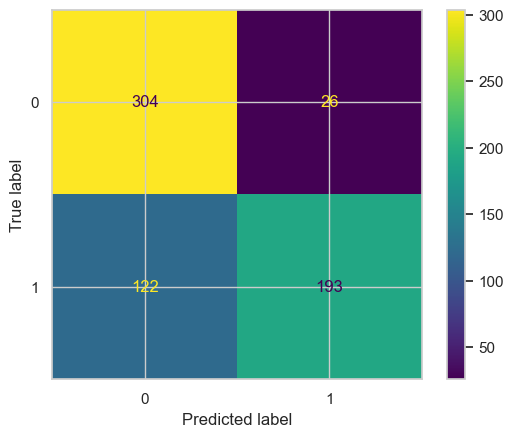

In [1131]:
# Making the model with radial basis function kernel
svc = SVC(kernel = 'rbf',gamma=1,C=1)
# Passing the model to the Function
predict(svc,X_train,X_test,Y_train,Y_test,"Support Vector Machine",names,testacc,trainacc,f1s)

In [1132]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# Set up Grid Search
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

# Best hyperparameters
print("Best hyperparameters from Grid Search: ", grid_search.best_params_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END ......................C=0.1, gamma=0.01

Performance of Support Vector Machine model

Train Accuracy Score: 0.5124031007751938
Test Accuracy Score: 0.5116279069767442
-------------------------------------------------- 
Classification Report for test set
              precision    recall  f1-score   support

           0       0.51      1.00      0.68       330
           1       0.00      0.00      0.00       315

    accuracy                           0.51       645
   macro avg       0.26      0.50      0.34       645
weighted avg       0.26      0.51      0.35       645

-------------------------------------------------- 
Confusion Matrix (Test Set)
[[330   0]
 [315   0]] 

Precision Score: 0.0
Recall Score: 0.0
F1 Score: 0.0 



d:\anaconda3\envs\pythonenviroment\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\anaconda3\envs\pythonenviroment\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\anaconda3\envs\pythonenviroment\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\anacond

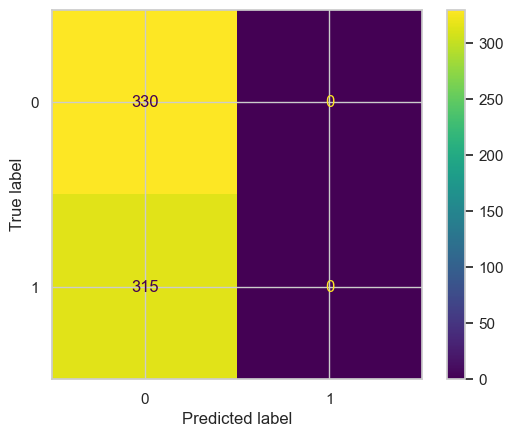

In [1133]:
# Making the model with radial basis function kernel
svc = SVC(kernel = 'rbf', random_state = 0,gamma=0.001,C=1)
# Passing the model to the Function
predict(svc,X_train,X_test,Y_train,Y_test,"Support Vector Machine",names,testacc,trainacc,f1s)

# **Decision** **Tree**

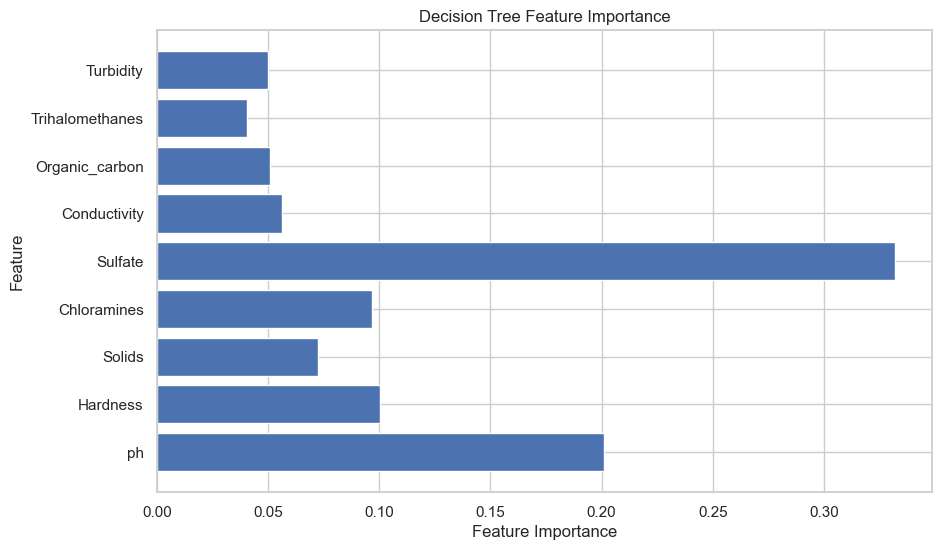

In [1134]:
# Train decision tree classifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

# Get feature importances
feature_importances = decision_tree.feature_importances_

# Visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Feature Importance')
plt.show()

Performance of Decision Tree model

Train Accuracy Score: 0.9112403100775194
Test Accuracy Score: 0.7798449612403101
-------------------------------------------------- 
Classification Report for test set
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       330
           1       0.77      0.77      0.77       315

    accuracy                           0.78       645
   macro avg       0.78      0.78      0.78       645
weighted avg       0.78      0.78      0.78       645

-------------------------------------------------- 
Confusion Matrix (Test Set)
[[259  71]
 [ 71 244]] 

Precision Score: 0.7746031746031746
Recall Score: 0.7746031746031746
F1 Score: 0.7746031746031746 



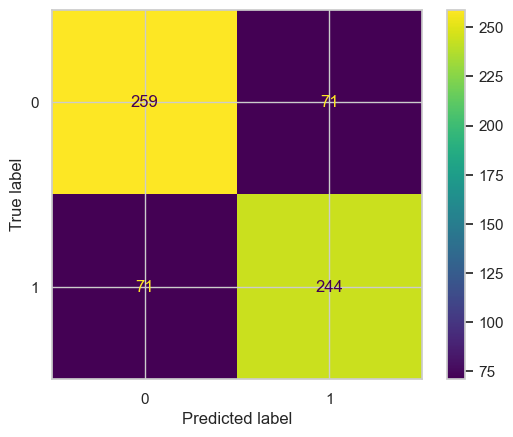

In [1135]:
# Making the model
Dt = DecisionTreeClassifier(criterion = 'gini', random_state = 0,max_depth=10,min_samples_leaf= 1,min_samples_split = 2,splitter ='best')
# Passing the model to the Function
predict(Dt,X_train,X_test,Y_train,Y_test,"Decision Tree",names,testacc,trainacc,f1s)

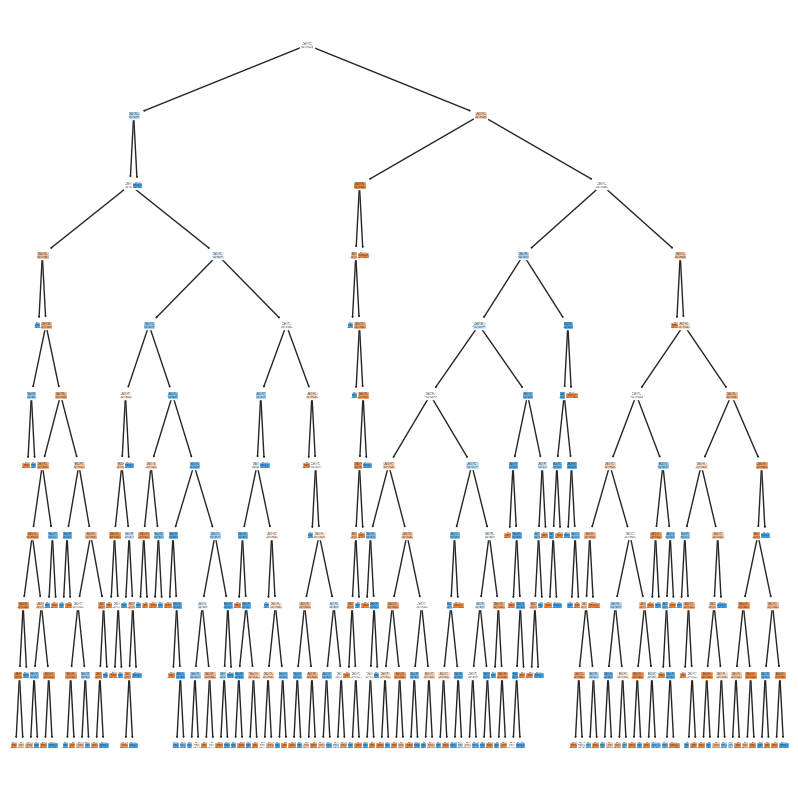

In [1136]:
from sklearn.tree import plot_tree
Dt.fit(X_train,Y_train)
plt.figure(figsize=(10,10))
plot_tree(Dt,filled=True,class_names=['not potable','potable'])
plt.show()


# **Decision Tree Classifier with Grid Search**

In [1137]:

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Create Decision Tree Classifier object
clf_31 = DecisionTreeClassifier()

# Define the parameter grid for grid search
param_grid = [
    {'criterion': ['gini'], 'max_depth': list(range(1, 16))},
    {'criterion': ['entropy'], 'max_depth': list(range(1, 16))}
]

# Create a grid search object
gs = GridSearchCV(clf_31, param_grid, scoring='accuracy', cv=10)

# Fit model using grid search
gs.fit(X_train, y_train)

# Get the best model from grid search
clf_best3 = gs.best_estimator_
print("Best model parameters:", clf_best3.get_params())

# Fit the best model to the data
clf_best3.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf_best3.predict(X_test)

# Print the accuracy score
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best model parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 15, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': None, 'splitter': 'best'}
Accuracy: 0.8


# **KNN**

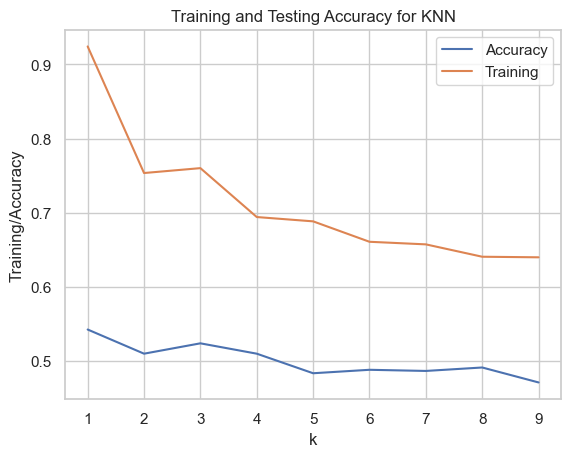

In [1138]:
# Create a KNeighborsClassifier model with different values of k
ks = range(1, 10)
accuracies = []
trainings = []

for k in ks:
  # Create a KNeighborsClassifier model with k neighbors
  knn = KNeighborsClassifier(n_neighbors=k)

  # Fit the model to the training set
  knn.fit(X_train, Y_train)


  # Calculate the accuracy of the model on the training set and the testing set
  training_accuracy = knn.score(X_train, Y_train)
  testing_accuracy = knn.score(X_test, Y_test)

  accuracies.append(testing_accuracy)
  trainings.append(training_accuracy)

# Plot the accuracy vs. k
plt.plot(ks, accuracies,label="Accuracy")
plt.plot(ks, trainings,label="Training")

plt.xlabel("k")
plt.ylabel("Training/Accuracy")
plt.title("Training and Testing Accuracy for KNN")
plt.legend(labels=["Accuracy", "Training"])
plt.show()

Performance of K-Nearest Neighbors model

Train Accuracy Score: 0.5492248062015503
Test Accuracy Score: 0.4992248062015504
-------------------------------------------------- 
Classification Report for test set
              precision    recall  f1-score   support

           0       0.51      0.55      0.53       330
           1       0.49      0.45      0.47       315

    accuracy                           0.50       645
   macro avg       0.50      0.50      0.50       645
weighted avg       0.50      0.50      0.50       645

-------------------------------------------------- 
Confusion Matrix (Test Set)
[[181 149]
 [174 141]] 

Precision Score: 0.4862068965517241
Recall Score: 0.44761904761904764
F1 Score: 0.46611570247933887 



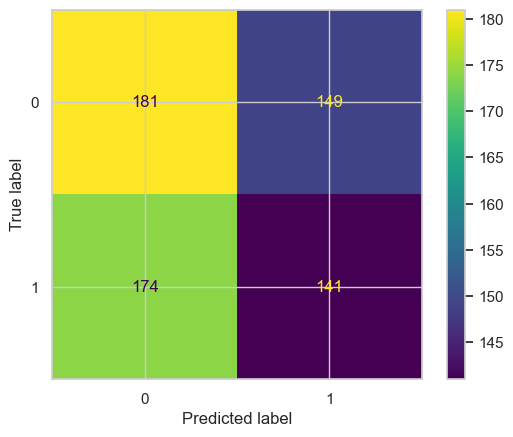

In [1139]:
# Making the base Model
knn = KNeighborsClassifier(n_neighbors=55)
# Passing the model to the Function
predict(knn,X_train,X_test,Y_train,Y_test,"K-Nearest Neighbors",names,testacc,trainacc,f1s)

# **Ranking the Models**

In [1140]:
scores['Model Name'] = names
scores['Accuracy'] = testacc
scores['train_Accuracy'] = trainacc
scores['F1 score'] = f1s

scores = scores.sort_values(by='F1 score', ascending = False)
scores.style.applymap(lambda x: 'background-color: royalblue', subset='F1 score')

C:\Users\Karen\AppData\Local\Temp\ipykernel_26848\2996204018.py:7: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  scores.style.applymap(lambda x: 'background-color: royalblue', subset='F1 score')


,Model Name,Accuracy,F1 score,train_Accuracy
2,Random Forest,0.803101,0.800000,0.913178
6,Decision Tree,0.779845,0.774603,0.911240
4,Support Vector Machine,0.770543,0.722846,0.994961
7,K-Nearest Neighbors,0.499225,0.466116,0.549225
3,Gaussian Naive Bayes,0.536434,0.453382,0.562016
0,Logistic Regression,0.510078,0.408240,0.529845
1,Logistic Regression grid search,0.499225,0.365422,0.525581
5,Support Vector Machine,0.511628,0.000000,0.512403


# deployment

In [1141]:

#file='project_model'
joblib.dump(lr,"project_model")
regmodel=joblib.load(open("project_model","rb"))

In [1142]:
#file='svm_model'
joblib.dump(svc,"svm_model")
svmmodel=joblib.load(open("svm_model","rb"))

In [1143]:
joblib.dump(decision_tree,"decision_tree_model")
dtmodel=joblib.load(open("decision_tree_model","rb"))

In [1144]:
joblib.dump(decision_tree,"random_forest_model")
rfmodel=joblib.load(open("random_forest_model","rb"))